# Clustering

## DBSCAN
- simple code from "scikit-learn"

In [1]:
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
# device setting
import torch

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Training with: {device}")

Training with: cuda


In [3]:
## data loading
# tensor vector to numpy vector 
import os

tensor_dir = "./tensors/final/latent_out/"
latent_outs = os.listdir(tensor_dir)

np_latent_list = []
name_list = []

for unit_latent in latent_outs:
    unit_tensor = torch.load(tensor_dir + unit_latent)
    unit_tensor = unit_tensor.to('cpu')
    np_latent_list.append(unit_tensor.numpy())
    name_list.append(unit_latent.replace(".pt", "", 1))

np_latent_outs = np.array(np.squeeze(np_latent_list))
print(np_latent_outs.shape)
print(name_list[0])

A = StandardScaler().fit_transform(np_latent_outs)

(1000, 16)
21_52


In [4]:
# PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
pca = TSNE(n_components=2, early_exaggeration=1)
A = pca.fit_transform(A)
# print(A)


In [23]:
db = KMeans(n_clusters=24).fit(A)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

clustered_names = list(zip(labels, name_list))
print(clustered_names[0])


Estimated number of clusters: 24
Estimated number of noise points: 0
(2, '21_52')


68
50
51
47
57
58
50
62
62
42
35
34
37
34
49
33
39
44
12
18
21
37
14
46


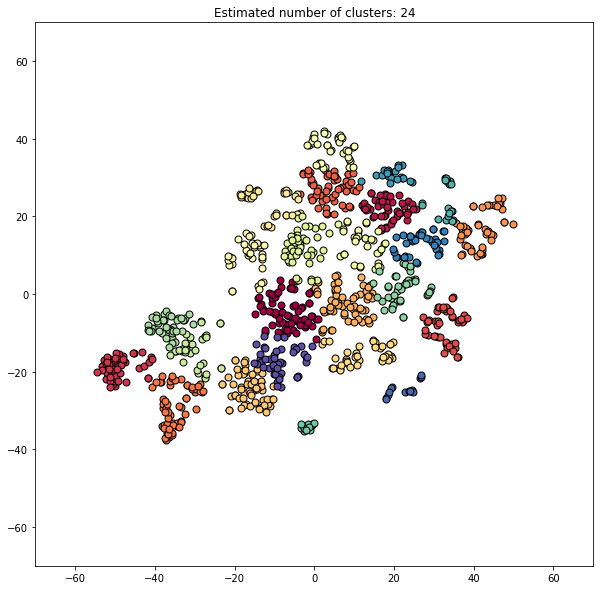

In [24]:
# Plot result
import matplotlib.pyplot as plt
# Black removed and is used for noise instead.

fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(projection='3d')
# ax.view_init(15, 75)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    # xy = A[class_member_mask & core_samples_mask]
    xy = A[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        # xy[:, 2],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=7,
    )
    print(len(xy))

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlim(-70, 70)
plt.ylim(-70, 70)
plt.show()

In [25]:
# clustered_names
file_title = f"kmeans_{n_clusters_}.txt"
print(file_title)
with open(os.path.join("kmeans_result", file_title), "w") as out_file:
    for idx_num, img_name in clustered_names:
        if idx_num > -2:
            out_file.write(img_name+" "+str(idx_num) + '\n')

kmeans_24.txt
